
 <img src="https://c.tenor.com/8p2VmmhyIVgAAAAM/red-bean-azuki.gif" alt="ether" width="100%"/>
 

# 🎴 Azuki Analysis

In [1]:
# Import dependancies
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
from etherscan_py import etherscan_py

In [2]:
# Loading .env containing our keys
load_dotenv()

True

In [3]:
# create variable for api key 
API_KEY = os.getenv('COVALENT_API_KEY')
type(API_KEY)

str

## 🎰 Getting token IDs

In [4]:
# Append url for our api
url = "https://api.covalenthq.com/v1"
chain_id = "/1"

In [5]:
# Create variables needed for getting token ID
contract_address = "/0xED5AF388653567Af2F388E6224dC7C4b3241C544"
api_key = "/?key=" + API_KEY

# Join url with variables
url_tokens = url + chain_id + "/tokens" + contract_address + "/nft_token_ids" + api_key 

# # Execute get request check response
response = requests.get(url_tokens)
response

<Response [200]>

In [6]:
# Create variale for our requests data
nft_tokens = requests.get(url_tokens).json()

# Conver json to dataframe
token_IDS = pd.DataFrame(nft_tokens['data']['items'])
# View token ID dataframe
token_IDS

,contract_decimals,contract_name,contract_ticker_symbol,contract_address,supports_erc,logo_url,token_id
0,0,Azuki,AZUKI,0xed5af388653567af2f388e6224dc7c4b3241c544,None,https://logos.covalenthq.com/tokens/0xed5af388...,0
1,0,Azuki,AZUKI,0xed5af388653567af2f388e6224dc7c4b3241c544,None,https://logos.covalenthq.com/tokens/0xed5af388...,1
2,0,Azuki,AZUKI,0xed5af388653567af2f388e6224dc7c4b3241c544,None,https://logos.covalenthq.com/tokens/0xed5af388...,2
3,0,Azuki,AZUKI,0xed5af388653567af2f388e6224dc7c4b3241c544,None,https://logos.covalenthq.com/tokens/0xed5af388...,3
4,0,Azuki,AZUKI,0xed5af388653567af2f388e6224dc7c4b3241c544,None,https://logos.covalenthq.com/tokens/0xed5af388...,4
...,...,...,...,...,...,...,...
9995,0,Azuki,AZUKI,0xed5af388653567af2f388e6224dc7c4b3241c544,None,https://logos.covalenthq.com/tokens/0xed5af388...,9995
9996,0,Azuki,AZUKI,0xed5af388653567af2f388e6224dc7c4b3241c544,None,https://logos.covalenthq.com/tokens/0xed5af388...,9996
9997,0,Azuki,AZUKI,0xed5af388653567af2f388e6224dc7c4b3241c544,None,https://logos.covalenthq.com/tokens/0xed5af388...,9997
9998,0,Azuki,AZUKI,0xed5af388653567af2f388e6224dc7c4b3241c544,None,https://logos.covalenthq.com/tokens/0xed5af388...,9998


In [7]:
# Isolate token-id and contract name columns only
token_IDS = pd.DataFrame(token_IDS, columns = ['token_id','contract_name'])
display(token_IDS.head())
display(token_IDS.tail())

,token_id,contract_name
0,0,Azuki
1,1,Azuki
2,2,Azuki
3,3,Azuki
4,4,Azuki


,token_id,contract_name
9995,9995,Azuki
9996,9996,Azuki
9997,9997,Azuki
9998,9998,Azuki
9999,9999,Azuki


## Viewing NFT owner Burnt

In [11]:
# Create variables needed for metadata
chain_id= '/1'
address = '/0xED5AF388653567Af2F388E6224dC7C4b3241C544'
token_id = '/199'

# Join url with variables
metadata_url = url + chain_id + "/tokens" + address + "/nft_metadata" + token_id + api_key

# Get Requests data
nft_data = requests.get(metadata_url).json()

# View json data
nft_data

{'data': {'updated_at': '2022-05-04T02:31:30.186750399Z',
  'items': [{'contract_decimals': 0,
    'contract_name': 'Azuki',
    'contract_ticker_symbol': 'AZUKI',
    'contract_address': '0xed5af388653567af2f388e6224dc7c4b3241c544',
    'supports_erc': ['erc20'],
    'logo_url': 'https://logos.covalenthq.com/tokens/1/0xed5af388653567af2f388e6224dc7c4b3241c544.png',
    'type': 'nft',
    'nft_data': [{'token_id': '199',
      'token_balance': '1',
      'token_url': 'https://azuki-prereveal.s3-us-west-1.amazonaws.com/metadata/199',
      'supports_erc': ['erc20', 'erc721'],
      'token_price_wei': None,
      'token_quote_rate_eth': None,
      'original_owner': '0xd45058bf25bbd8f586124c479d384c8c708ce23a',
      'external_data': {'name': 'Azuki #199',
       'description': None,
       'image': 'https://azuki-prereveal.s3.us-west-1.amazonaws.com/bean.gif',
       'image_256': 'https://image-proxy.svc.prod.covalenthq.com/256,fit,png/https://azuki-prereveal.s3.us-west-1.amazonaws.com/

In [12]:
# Create data frame for NFT metadata for collection and Isolate token id, owners and if burned
nft_metadata = pd.DataFrame(nft_data['data']['items'][0]['nft_data'], columns = ['token_id','owner', 'burned'])

# View data
nft_metadata.head()

,token_id,owner,burned
0,199,0x32fc55218a0a4263d2ca23712c6264cc6840213b,False


In [13]:
# Create variables needed for owner data and add to url
test_token_id = 0
owner_url = url + chain_id + "/tokens" + address + "/nft_metadata" + '/' + str(test_token_id) + api_key

# Get request
owner_data = requests.get(owner_url).json()

# Convert Owner json data to a dataframe and view data
owner_data_df = pd.DataFrame(owner_data['data']['items'][0]['nft_data'])
owner_data_df.head()

,token_id,token_balance,token_url,supports_erc,token_price_wei,token_quote_rate_eth,original_owner,external_data,owner,owner_address,burned
0,0,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #0', 'description': None, 'ima...",0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xd45058bf25bbd8f586124c479d384c8c708ce23a,False


# Concating all Owner metadata

In [14]:
# Create empty dataframe for token_owner DataFrame
new_owner_columns = owner_data_df.columns

In [15]:
# Creating a new empty DataFrame to append all nft owner data rows into
token_owners = pd.DataFrame(columns = new_owner_columns)

# Show Token owner empty dataframes
token_owners

,token_id,token_balance,token_url,supports_erc,token_price_wei,token_quote_rate_eth,original_owner,external_data,owner,owner_address,burned


In [16]:
# Loop through owner data and add into empty token_owners dataframe range = 10000
for token_id in range(100):
    owner_url = url + chain_id + "/tokens" + address + "/nft_metadata" + '/' + str(token_id) + api_key
    
    # Get Request and convert json to dataframe
    owner_data = requests.get(owner_url).json() 
    df = pd.DataFrame(owner_data['data']['items'][0]['nft_data'])
   
    token_owners.loc[token_id] = [df.iloc[0]['token_id'], df.iloc[0]['token_balance'], df.iloc[0]['token_url'], df.iloc[0]['supports_erc'], df.iloc[0]['token_price_wei'], df.iloc[0]['token_quote_rate_eth'], df.iloc[0]['original_owner'],df.iloc[0]['external_data'], df.iloc[0]['owner'], df.iloc[0]['owner_address'], df.iloc[0]['burned']]

In [17]:
# Show token owner data
display(token_owners.head())
display(token_owners.tail())

,token_id,token_balance,token_url,supports_erc,token_price_wei,token_quote_rate_eth,original_owner,external_data,owner,owner_address,burned
0,0,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #0', 'description': None, 'ima...",0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xd45058bf25bbd8f586124c479d384c8c708ce23a,False
1,1,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #1', 'description': None, 'ima...",0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xd45058bf25bbd8f586124c479d384c8c708ce23a,False
2,2,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #2', 'description': None, 'ima...",0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xd45058bf25bbd8f586124c479d384c8c708ce23a,False
3,3,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #3', 'description': None, 'ima...",0x645d2b4bfb047566ff60e2e7112373885935eac4,0x645d2b4bfb047566ff60e2e7112373885935eac4,False
4,4,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #4', 'description': None, 'ima...",0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xd45058bf25bbd8f586124c479d384c8c708ce23a,False


,token_id,token_balance,token_url,supports_erc,token_price_wei,token_quote_rate_eth,original_owner,external_data,owner,owner_address,burned
95,95,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #95', 'description': None, 'im...",0xc1b82e8f2a4feb8fb491534ca6439ff642c7dc7c,0xc1b82e8f2a4feb8fb491534ca6439ff642c7dc7c,False
96,96,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #96', 'description': None, 'im...",0x355671aa122887c1b349a84ee79805e22e62f4f9,0x355671aa122887c1b349a84ee79805e22e62f4f9,False
97,97,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #97', 'description': None, 'im...",0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xd45058bf25bbd8f586124c479d384c8c708ce23a,False
98,98,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #98', 'description': None, 'im...",0x0c4f6bafb40663bec5a24cab510c4764e4c4d86c,0x0c4f6bafb40663bec5a24cab510c4764e4c4d86c,False
99,99,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #99', 'description': None, 'im...",0x9222b25398552d9bca9d8ed1a5b79bdb6d35e3ff,0x9222b25398552d9bca9d8ed1a5b79bdb6d35e3ff,False


In [31]:
# check if burned
burned = token_owners[token_owners['burned'] == False]
burned

,token_id,token_balance,token_url,supports_erc,token_price_wei,token_quote_rate_eth,original_owner,external_data,owner,owner_address,burned
0,0,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #0', 'description': None, 'ima...",0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xd45058bf25bbd8f586124c479d384c8c708ce23a,False
1,1,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #1', 'description': None, 'ima...",0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xd45058bf25bbd8f586124c479d384c8c708ce23a,False
2,2,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #2', 'description': None, 'ima...",0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xd45058bf25bbd8f586124c479d384c8c708ce23a,False
3,3,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #3', 'description': None, 'ima...",0x645d2b4bfb047566ff60e2e7112373885935eac4,0x645d2b4bfb047566ff60e2e7112373885935eac4,False
4,4,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #4', 'description': None, 'ima...",0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xd45058bf25bbd8f586124c479d384c8c708ce23a,False
...,...,...,...,...,...,...,...,...,...,...,...
95,95,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #95', 'description': None, 'im...",0xc1b82e8f2a4feb8fb491534ca6439ff642c7dc7c,0xc1b82e8f2a4feb8fb491534ca6439ff642c7dc7c,False
96,96,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #96', 'description': None, 'im...",0x355671aa122887c1b349a84ee79805e22e62f4f9,0x355671aa122887c1b349a84ee79805e22e62f4f9,False
97,97,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #97', 'description': None, 'im...",0xd45058bf25bbd8f586124c479d384c8c708ce23a,0xd45058bf25bbd8f586124c479d384c8c708ce23a,False
98,98,1,https://azuki-prereveal.s3-us-west-1.amazonaws...,"[erc20, erc721]",None,None,0xd45058bf25bbd8f586124c479d384c8c708ce23a,"{'name': 'Azuki #98', 'description': None, 'im...",0x0c4f6bafb40663bec5a24cab510c4764e4c4d86c,0x0c4f6bafb40663bec5a24cab510c4764e4c4d86c,False


## Historical data checking unique token sales

In [19]:
# Create variables needed for owner data and add to url
collection_address = '/0xED5AF388653567Af2F388E6224dC7C4b3241C544'
historical_url = url + chain_id + "/nft_market/collection" + collection_address + api_key

# Get request
historical = requests.get(historical_url).json()

# Convert historical json data to a dataframe and view data
historical_df = pd.DataFrame(historical['data']['items'])

# Set index to date
historical_df = historical_df.set_index('opening_date')

# Create Volume dataframe
azuki_vol_df = pd.DataFrame(historical_df, columns = ['volume_quote_day', 'average_volume_quote_day', 'unique_token_ids_sold_count_day'])
azuki_vol_df.head()

,volume_quote_day,average_volume_quote_day,unique_token_ids_sold_count_day
opening_date,,,
2022-04-06,3508797.8,113187.02,27
2022-04-05,3729874.8,106567.84,34
2022-04-04,4517060.5,110172.21,40
2022-04-03,9899117.0,116460.20,64
2022-04-02,24722180.0,124232.06,193


## Convert wei to ETH

In [20]:
# Covert volume in wei column to eth
volume_eth_day = []
for wei in historical_df['volume_wei_day']:
    eth = int(wei)/100000000000000000
    volume_eth_day.append(eth)
    
# Covert avarage volume in wei column to eth
avg_volume_eth_day = []
for wei in historical_df['average_volume_wei_day']:
    eth = int(wei)/100000000000000000
    avg_volume_eth_day.append(eth)
    
# Covert floor in wei column to eth
floor_price_eth_7d = []
for wei in historical_df['floor_price_wei_7d']:
    eth = int(wei)/100000000000000000
    floor_price_eth_7d.append(eth)

# Add eth columns to azuki dataframe
azuki_vol_df['volume_eth_day'] = volume_eth_day 
azuki_vol_df['avg_volume_eth_day'] = avg_volume_eth_day
azuki_vol_df['floor_price_eth_7d'] = floor_price_eth_7d

# View historical data
azuki_vol_df.head()

,volume_quote_day,average_volume_quote_day,unique_token_ids_sold_count_day,volume_eth_day,avg_volume_eth_day,floor_price_eth_7d
opening_date,,,,,,
2022-04-06,3508797.8,113187.02,27,10477.800000,337.993548,399.328829
2022-04-05,3729874.8,106567.84,34,10681.880000,305.196571,396.006765
2022-04-04,4517060.5,110172.21,40,12880.587900,314.160680,389.024154
2022-04-03,9899117.0,116460.20,64,28465.407206,334.887144,381.498421
2022-04-02,24722180.0,124232.06,193,71202.109900,357.799547,376.416153


<AxesSubplot:xlabel='opening_date'>

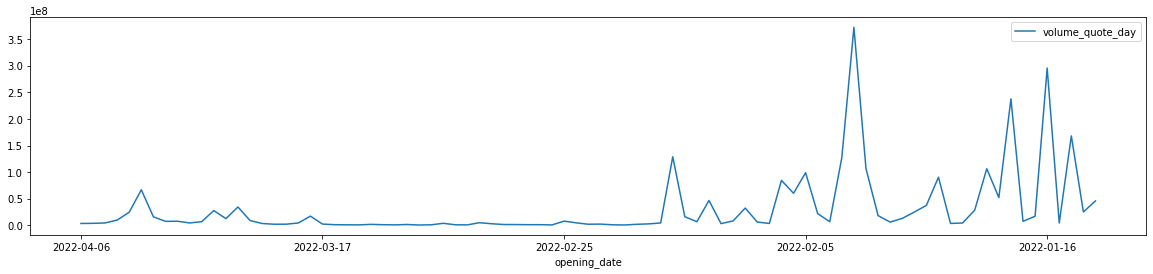

In [21]:
# Plot Volume quote per day
azuki_vol_df.plot.line(y = 'volume_quote_day', figsize = (20,4))

## Get Current value of ETH using ethersan API

In [22]:
# import dependancy
from etherscan_py import etherscan_py
client = etherscan_py.Client(os.getenv('ETHERSCAN_API'))

# Print current eth price and latest block height
print(client.get_eth_price())
print(client.get_latest_block_height())

2798.58
14708342


## Get Transaction data from Azuki Collection

In [25]:
# Set variables for transaction data
collection_address = '/0xED5AF388653567Af2F388E6224dC7C4b3241C544'
api_key_1 = '&key=' + API_KEY  

# Quering the API for transaction data
tx_url = url + chain_id + "/address" + collection_address + '/transactions_v2/?quote-currency=USD&format=JSON&block-signed-at-asc=false&no-logs=false&page-number=1&page-size=10000' + api_key_1 
tx = requests.get(tx_url).json()

# Convert transactions data to dataframe
tx_df = pd.DataFrame(tx['data']['items'])
tx_df.head()

,block_signed_at,block_height,tx_hash,tx_offset,successful,from_address,from_address_label,to_address,to_address_label,value,value_quote,gas_offered,gas_spent,gas_price,fees_paid,gas_quote,gas_quote_rate,log_events
0,2022-03-29T05:39:13Z,14479266,0x37c7aa1cbff4022ac4fe4498e0ab0902ce3b82f69602...,150,True,0x339ae8fe27e6dbbde874783cff0f4eb83b6b9b55,None,0x7f268357a8c2552623316e2562d90e642bb538e5,Wyvern Exchange Contract (-),17800000000000000000,59948.548730,282042,207214,29035176314,6016495024729196,20.262930,3367.895996,"[{'block_signed_at': '2022-03-29T05:39:13Z', '..."
1,2022-03-29T05:38:45Z,14479263,0xeaaecb72e736de2964ff6dd9e8cd23fa7af250f38aa3...,19,True,0x461c65bc41c8c822177900dfd8217ecebc3a479e,None,0x7f268357a8c2552623316e2562d90e642bb538e5,Wyvern Exchange Contract (-),17400000000000000000,58601.390332,282026,207202,35979372754,7454997993374308,25.107658,3367.895996,"[{'block_signed_at': '2022-03-29T05:38:45Z', '..."
2,2022-03-29T05:33:41Z,14479245,0xdfc875e0dc1d9be426e1f50fc1144c32d793d1d9b9d1...,0,True,0xddf767f258adf0af89896621349cadcf8722f771,None,0x7f268357a8c2552623316e2562d90e642bb538e5,Wyvern Exchange Contract (-),17150000000000000000,57759.416333,259805,194909,80446275020,15679703017873180,52.807609,3367.895996,"[{'block_signed_at': '2022-03-29T05:33:41Z', '..."
3,2022-03-29T05:32:30Z,14479243,0x09f5ad32346e10661d1d104b7981e72c7dd5bfe48a6e...,178,True,0x9adb10f75d063c708f7f609a150488dc70d4d603,None,0xed5af388653567af2f388e6224dc7c4b3241c544,None,0,0.000000,46189,46189,26187712940,1209584272985660,4.073754,3367.895996,"[{'block_signed_at': '2022-03-29T05:32:30Z', '..."
4,2022-03-29T05:31:57Z,14479239,0xb9239e1d002d417a8c4c8da9d4cef445d52132ed5ae9...,233,True,0x8091deca14db6db65555331b83f09d23188af92b,None,0xed5af388653567af2f388e6224dc7c4b3241c544,None,0,0.000000,43615,24277,28407744154,689654804826658,2.322686,3367.895996,"[{'block_signed_at': '2022-03-29T05:31:57Z', '..."


In [26]:
# Filter Through data for non null transactions
tx_value_df = tx_df[tx_df['value'] != '0']
values = tx_value_df[tx_value_df['to_address_label'].notnull()]

# View transaction data
values.head()

,block_signed_at,block_height,tx_hash,tx_offset,successful,from_address,from_address_label,to_address,to_address_label,value,value_quote,gas_offered,gas_spent,gas_price,fees_paid,gas_quote,gas_quote_rate,log_events
0,2022-03-29T05:39:13Z,14479266,0x37c7aa1cbff4022ac4fe4498e0ab0902ce3b82f69602...,150,True,0x339ae8fe27e6dbbde874783cff0f4eb83b6b9b55,None,0x7f268357a8c2552623316e2562d90e642bb538e5,Wyvern Exchange Contract (-),17800000000000000000,59948.548730,282042,207214,29035176314,6016495024729196,20.262930,3367.895996,"[{'block_signed_at': '2022-03-29T05:39:13Z', '..."
1,2022-03-29T05:38:45Z,14479263,0xeaaecb72e736de2964ff6dd9e8cd23fa7af250f38aa3...,19,True,0x461c65bc41c8c822177900dfd8217ecebc3a479e,None,0x7f268357a8c2552623316e2562d90e642bb538e5,Wyvern Exchange Contract (-),17400000000000000000,58601.390332,282026,207202,35979372754,7454997993374308,25.107658,3367.895996,"[{'block_signed_at': '2022-03-29T05:38:45Z', '..."
2,2022-03-29T05:33:41Z,14479245,0xdfc875e0dc1d9be426e1f50fc1144c32d793d1d9b9d1...,0,True,0xddf767f258adf0af89896621349cadcf8722f771,None,0x7f268357a8c2552623316e2562d90e642bb538e5,Wyvern Exchange Contract (-),17150000000000000000,57759.416333,259805,194909,80446275020,15679703017873180,52.807609,3367.895996,"[{'block_signed_at': '2022-03-29T05:33:41Z', '..."
5,2022-03-29T05:31:06Z,14479236,0x5e6bcdd4ada4cc673aaaafcfdacb55053e205927a2a5...,208,True,0x61796c9e31ffa87a92c13122879783aa90266232,None,0x7f268357a8c2552623316e2562d90e642bb538e5,Wyvern Exchange Contract (-),16990000000000000000,57220.552974,259821,190121,25076821638,4767630406638198,16.056883,3367.895996,"[{'block_signed_at': '2022-03-29T05:31:06Z', '..."
8,2022-03-29T05:23:29Z,14479195,0x8bf9f40e608dda8ee015e4d9706fc4eadea22c4a58b0...,169,True,0x87ad0267b437575b58624afbb67ad3a7f6876566,None,0x7f268357a8c2552623316e2562d90e642bb538e5,Wyvern Exchange Contract (-),23490000000000000000,79111.876948,259890,194974,30210059335,5890176108782290,19.837501,3367.895996,"[{'block_signed_at': '2022-03-29T05:23:29Z', '..."
